## Generate a bathymetry file (as well as delx and dely files) for the high resolution run

Horizontal resolution is 120 m.




This notebook is based on the functions *make_arbitrary_topo_smooth*, *tanktopo*, *canyontopo* and *widthprofile* which were originally written by S. Allen, and modified by T. Howatt and J. Spurgin (They have been translated form python to matlab and here to python again). 

They have to be loaded from the package canyon_tools.bathy_tools

K. Ramos Musalem

In [1]:
import canyon_tools.bathy_tools as bat

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# Arrays of alongshore and cross-shore positions, dx is 111.11 m, dy = 125.0 m
alongshore_x = np.linspace(0,120000,1080)
crossshore_y = np.linspace(0,90000,720)


In [3]:
total_fluid_depth = 1200.0

###Jessica's canyon###
#y_base = 25950.0  
#y_bc = 26360.0
#y_sb = 51220.0
#y_100 = 56130.0
#y_50 = 64220.0
#y_wall = 90000.0
#y_coast = 72400.0

#z_bottom = 100.0 
#z_sb = 1050.0 
#z_100 = 1100.0 
#z_wall = 1180.0
#z_bc = 200.0
#z_50 = 1150.0
#z_200 = 1000.0
#z_400 = 800.0
#z_600 = 600.0
#z_800 = 400.0

#x_wall = 120000.0
#cR = 5370.0        # radius of curvature on upstream side
#W = 7660.0     # canyon width at half-length
#Wsb = 13005.0   # canyon width at shelf-break 
#L = 16180.0       # canyon length

#set geometric parameters (see geometry.ods)
#p = 4.0                    # saved as geometry.csv        
#q = 6.0
# Constant buoyancy frequency
#N = 0.004

###############################################################################
### Barkley Canyon -like ###
y_base = 25950.0  
y_bc = 26360.0
y_sb = 51220.0
y_100 = 56130.0
y_50 = 64220.0
y_wall = 90000.0
y_coast = 72400.0

z_bottom = 100.0 
z_sb = 1050.0 
z_100 = 1100.0 
z_wall = 1180.0
z_bc = 200.0
z_50 = 1150.0
z_200 = 1000.0
z_400 = 800.0
z_600 = 600.0
z_800 = 400.0


x_wall = 120000.0
cR = 5000.0        # radius of curvature on upstream side
W = 8300.0     # canyon width at half-length
Wsb = 13000.0   # canyon width at shelf-break 
L = 6400.0       # canyon length

############################################################################
### Typical NW-Pacific canyon (see spreadsheet in google docs) ###
#y_base = 25950.0  
#y_bc = 26360.0
#y_sb = 51220.0
#y_100 = 56130.0
#y_50 = 64220.0
#y_wall = 90000.0
#y_coast = 72400.0

#z_bottom = 100.0 
#z_sb = 1050.0 
#z_100 = 1100.0 
#z_wall = 1180.0
#z_bc = 200.0
#z_50 = 1150.0
#z_200 = 1000.0
#z_400 = 800.0
#z_600 = 600.0
#z_800 = 400.0 

#x_wall = 120000.0
#cR = 8060.0        # radius of curvature on upstream side
#W = 10000.0     # canyon width at half-length
#Wsb = 20000.0   # canyon width at shelf-break 
#L = 14000.0       # canyon length
###################################################################

#set geometric parameters (see geometry.ods)
p = 4.0                    # saved as geometry.csv        
q = 6.0

# Grid size in x and y
x_size = 1080
y_size = 720


d = bat.make_arbitrary_topo_smooth(total_fluid_depth,cR,W,Wsb,L,p,alongshore_x,x_wall,
                                   crossshore_y,y_base,y_bc,y_sb,y_coast,z_bottom,z_bc,z_sb,z_wall)

d_NoC = bat.make_flat_shelf(total_fluid_depth,cR,W,Wsb,L,p,alongshore_x,x_wall,crossshore_y,y_base,y_bc,y_sb,y_coast,z_bottom,z_bc,z_sb,z_wall)



bathy=d
bathy_NoC=d_NoC

print(bathy.shape)
print(bathy_NoC.shape)


(1080, 720)
(1080, 720)


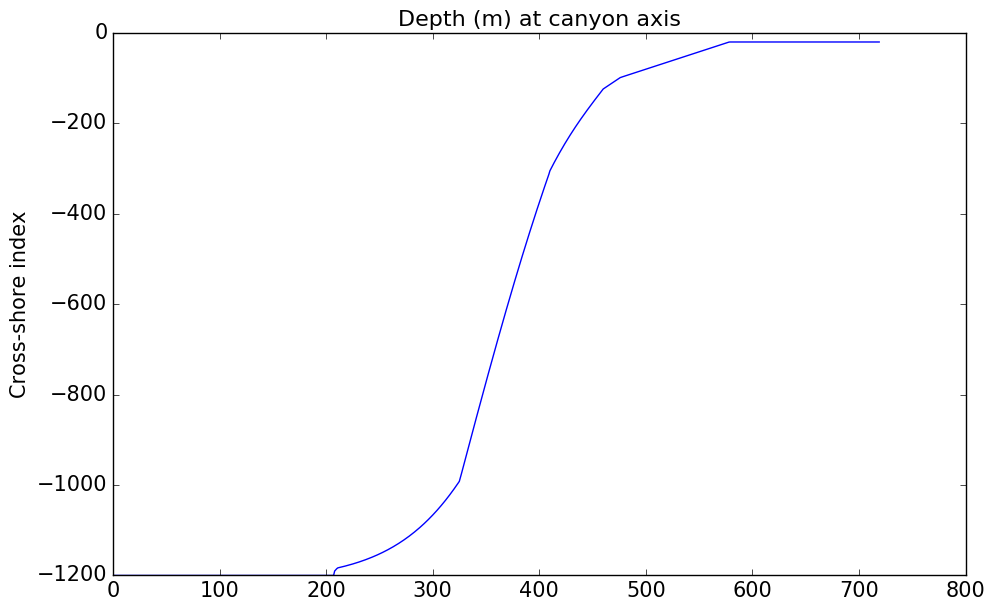

In [4]:

plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(11,7))

CS = plt.plot(bathy[500,:] )

plt.title('Depth (m) at canyon axis',fontsize=16)
plt.ylabel('depth (m)')
plt.ylabel('Cross-shore index')



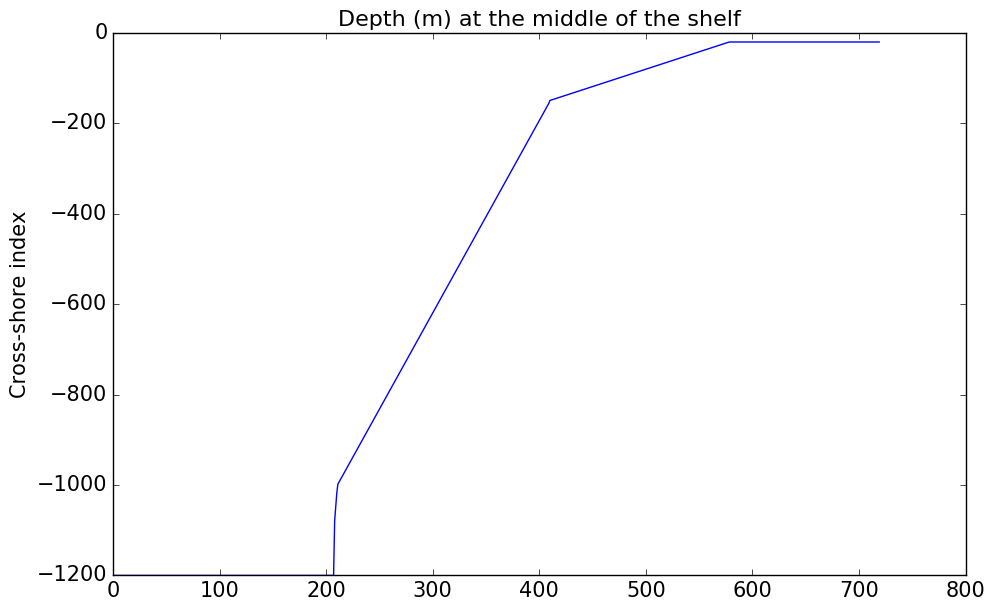

In [5]:
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(11,7))

CS = plt.plot(bathy_NoC[500,:] )

plt.title('Depth (m) at the middle of the shelf',fontsize=16)
plt.ylabel('depth (m)')
plt.ylabel('Cross-shore index')


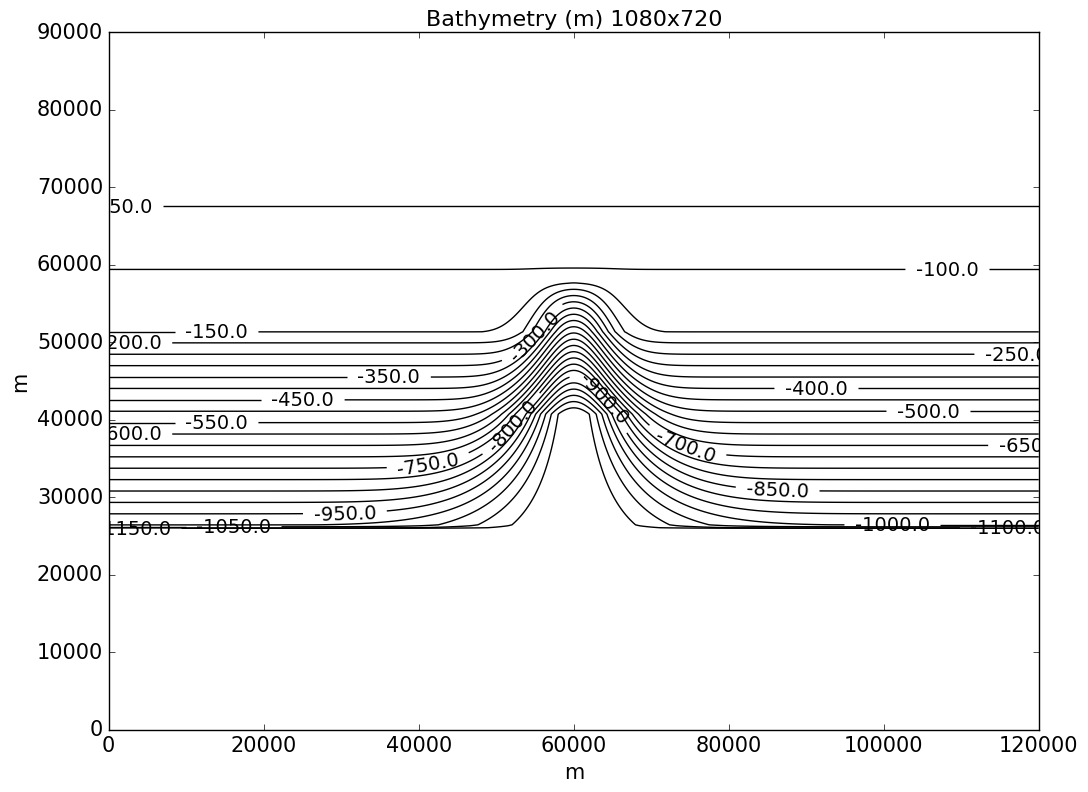

In [8]:
plt.rcParams['contour.negative_linestyle'] = 'solid'

fig = plt.figure(figsize=(12,9))

CS = plt.contour(alongshore_x,crossshore_y,np.transpose(bathy),25,colors='k' )

plt.clabel(CS, 
           inline=1,
           fmt='%1.1f',
           fontsize=14)

plt.xlabel('m')
plt.ylabel('m')
plt.title('Bathymetry (m) 1080x720',fontsize=16)



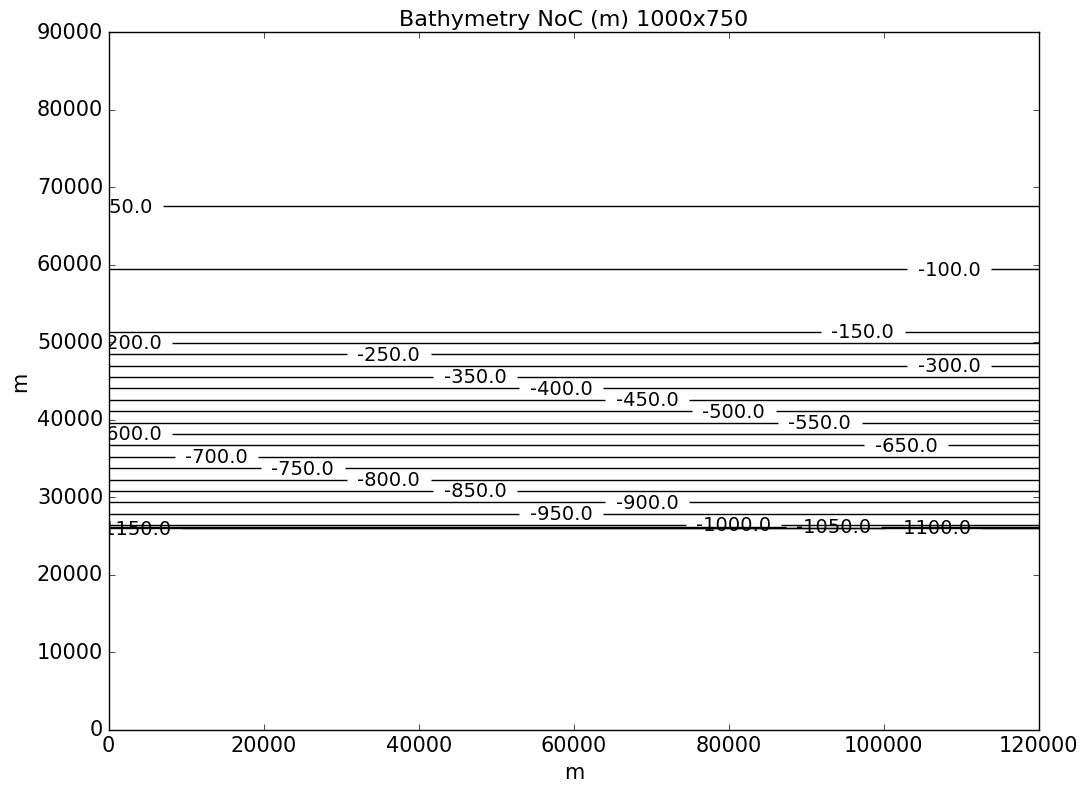

In [9]:
plt.rcParams['contour.negative_linestyle'] = 'solid'

fig = plt.figure(figsize=(12,9))

CS = plt.contour(alongshore_x,crossshore_y,np.transpose(bathy_NoC),25,colors='k' )

plt.clabel(CS, 
           inline=1,
           fmt='%1.1f',
           fontsize=14)

plt.xlabel('m')
plt.ylabel('m')
plt.title('Bathymetry NoC (m) 1000x750',fontsize=16)


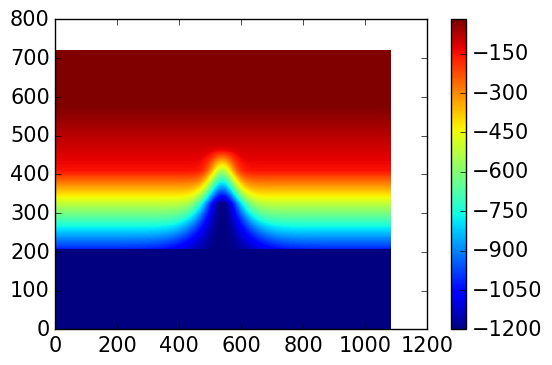

In [10]:
# saving binary files, we don't need daelx dely files because they are constant and
# can be specified in data file as delX=1080*111.11, delY=720*125.00

dt = np.dtype('>f8')  # float 64 big endian

tmpfile = "bathy_smooth_%dx%d_HIGHRES_BarkleyLike.bin"%(x_size,y_size)
fileobj = open(tmpfile, mode='wb')
dd=np.transpose(bathy)
#dd=np.asfortranarray(bathy, dtype=dt)
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd)
plt.colorbar()


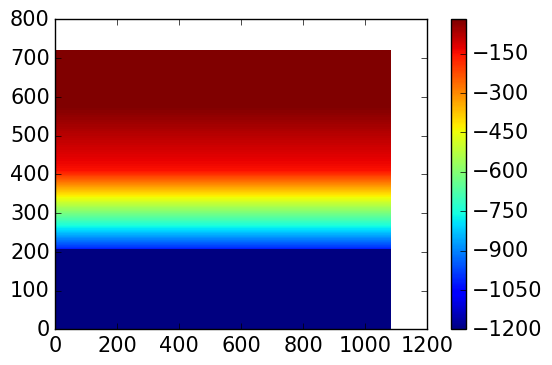

In [11]:
# saving binary files, we don't need daelx dely files because they are constant and
# can be specified in data file as delX=1080*111.11, delY=720*125.0

dt = np.dtype('>f8')  # float 64 big endian

tmpfile = "bathy_smooth_%dx%d_HIGHRES_NoCanyon.bin"%(x_size,y_size)
fileobj = open(tmpfile, mode='wb')
dd=np.transpose(bathy_NoC)
#dd=np.asfortranarray(bathy, dtype=dt)
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd)
plt.colorbar()


In [12]:
#Check that it works when read by Fortran

filename = 'bathy_smooth_%dx%d_HIGHRES_BarkleyLike.bin'%(x_size,y_size)
cc=np.fromfile(filename, dtype=dt)
np.shape(cc)

(777600,)

In [13]:
filename = 'bathy_smooth_%dx%d_HIGHRES_NoCanyon.bin'%(x_size,y_size)
cc_noc=np.fromfile(filename, dtype=dt)
np.shape(cc_noc)

(777600,)

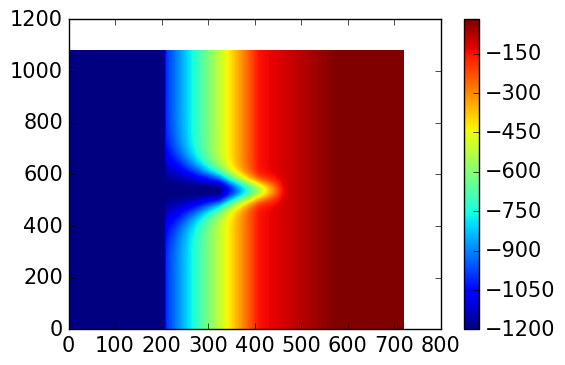

In [14]:
bF=np.reshape(cc,[x_size,y_size],order='F') # F to read in Fortran order
plt.pcolor(bF)
plt.colorbar()

 Parameter definitions:
 --------------------
 
  y_wall = the length of the ocean basin (y-axis)(going from 0=deep ocean m high values = coast
  x_wall = the width of the ocean basin (x-axis)
  y_base = the distance where the slope begins to rise from the bottom
   y_bc = the distance to the canyon mouth
   y_sb = the distance of the shelf break
   y_100 = the distance to the 100m isobath
   y_50 = the distance to the 50m isobath
 y_coast = the distance to the "coast" where topography stops increasing, but depth NOT =0
z_bottom = depth of the "deep ocean"; z is measured from the bottom up
  z_bc = depth of the 1000 m contour
  z_800 = depth of the 800 m contour
  z_600 = depth of the 600 m contour
  z_400 = depth of the 400 m contour
  z_200 = depth of the 200 m contour
   z_sb = shelf break depth (150m)
  z_100 = depth of the 100 m contour
   z50 = depth of the 50 m contour
  z_wall = the depth of the topography beyond the y_coast variable (i.e. z_wall NOT = total fluid depth)
  cR = the radius of curvature at the shelf break depth
   W = the width at half the length at the shelf break depth
   Wsb = the width at the shelf break
   L = the length of the canyon
   p,q = geometric parameters used to help shape the canyon see geometry.ods

